In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

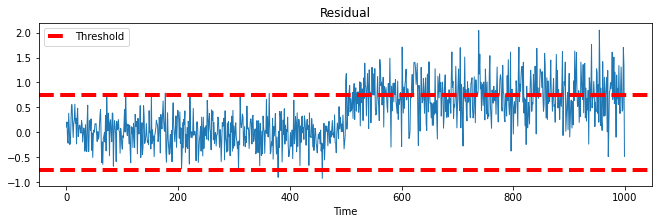

In [41]:
#create a noisy time series round to 0 

x = np.random.normal(0,0.3,1000)
fig = plt.figure(figsize=(11,3))

perturbation = np.zeros(1000)
perturbation[500:] = np.random.normal(0.75,0.3,500)

y = x + perturbation
plt.plot(y, lw = 1)
plt.title('Residual')
#draw two horizontal lines at 1 and -1
plt.axhline(0.75, color='r', linestyle='--', label='Threshold', lw = 4)   
plt.axhline(-0.75, color='r', linestyle='--', lw = 4)
plt.xlabel('Time')
plt.legend()
plt.savefig('line_plot.svg')  
plt.show()


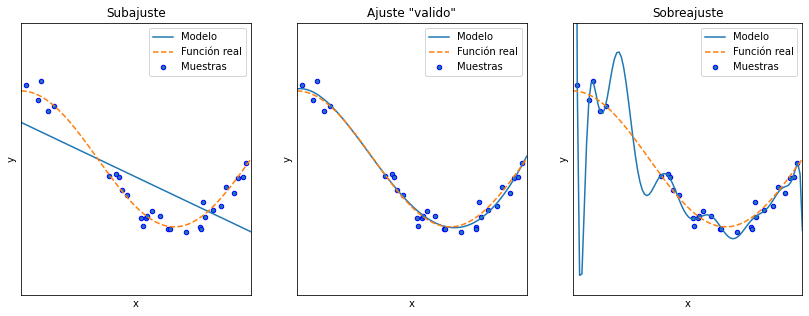

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

d = {0: 'Subajuste', 1: 'Ajuste "valido"', 2: 'Sobreajuste'}

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo")
    plt.plot(X_test, true_fun(X_test), '--', label="Función real")
    plt.scatter(X, y, edgecolor="b", s=20, label="Muestras")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "{}".format(d[i])
    )

    
plt.savefig('overfitting_plot.svg')

plt.show()

In [49]:
gral_path = 'D:/Desktop/github memoria/modelos-estanque'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

raw_df = pd.read_csv(gral_path+'/datos estanque/datos sin falla/5s/no10m5_train_st5s.csv', names = ['tiempo', 'referencia', 'hc', 'f_pid'], low_memory= False)[1:].reset_index(drop=True)

df = raw_df[::5]

In [10]:
df.head()

,tiempo,referencia,hc,f_pid
0,1,40,0.000000,0.0
5,6,40,0.000001,100.0
10,11,40,113.464186,100.0
15,16,40,14.201912,0.0
20,21,40,19.124743,100.0


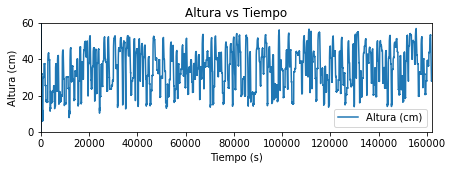

In [50]:
plt.figure(figsize=(7, 2))

plt.plot(df['tiempo'], df['hc'], label='Altura (cm)')
# plt.plot(df['tiempo'], df['f_pid'], label='% Bomba (%)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (cm)')
plt.title('Altura vs Tiempo')
plt.xlim((0, 162000))
plt.ylim((0, 60))
plt.legend()


    
plt.savefig('altura.svg',bbox_inches='tight', dpi=150)

plt.show()


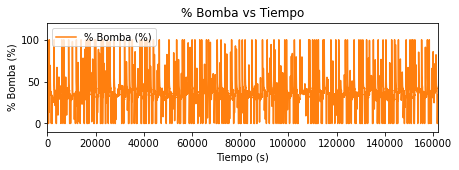

In [51]:
plt.figure(figsize=(7, 2))

plt.plot([],[])
# plt.plot(df['tiempo'], df['hc'], label='Altura (cm)')
plt.plot(df['tiempo'], df['f_pid'],label='% Bomba (%)')
plt.xlabel('Tiempo (s)')
plt.ylabel('% Bomba (%)')
plt.title('% Bomba vs Tiempo')
plt.xlim((0, 162000))
plt.ylim((-10, 120))
plt.legend()


    
plt.savefig('bomba.svg',bbox_inches='tight', dpi=150)

plt.show()

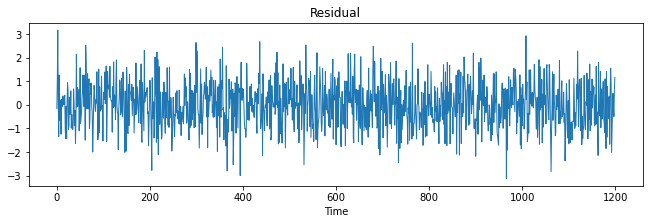

In [60]:
#plot a random stacionary time series
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

y_random = np.random.normal(0,1,1200)
fig = plt.figure(figsize=(11,3))
plt.plot(y_random, lw = 1)
plt.title('Residual')
plt.xlabel('Time')
plt.show()

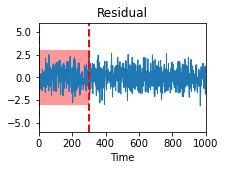

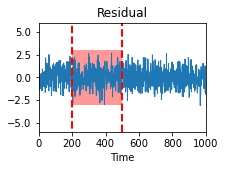

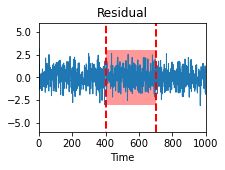

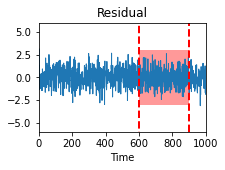

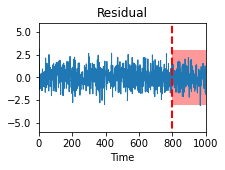

In [84]:
    #draw a window of 100 samples
for i in range(5):   
        wsize = 100
        fig = plt.figure(figsize=(3,2))
        plt.plot(y_random, lw = 1)
        plt.title('Residual')  
        plt.xlabel('Time')
        plt.xlim((0, 1000))
        plt.ylim((-6, 6))
        plt.axvline(0+200*i, -3,3, color='r', linestyle='--', label='Window', lw = 2)
        plt.axvline(300+200*i, color='r', linestyle='--', label='Window', lw = 2)
        #fill the area between the lines
        plt.fill_between(np.arange(0+200*i,300+200*i), -3, 3, facecolor='red', alpha=0.4)
        
    
        plt.savefig(f'sldng_wdw_{i}.svg',bbox_inches='tight', dpi=150)


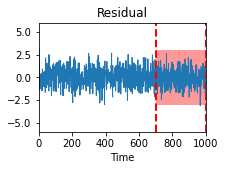

In [87]:
wsize = 100
fig = plt.figure(figsize=(3,2))
plt.plot(y_random, lw = 1)
plt.title('Residual')  
plt.xlabel('Time')
plt.xlim((0, 1000))
plt.ylim((-6, 6))
plt.axvline(700, color='r', linestyle='--', label='Window', lw = 2)
plt.axvline(1000, color='r', linestyle='--', label='Window', lw = 2)
#fill the area between the lines
plt.fill_between(np.arange(700,1000), -3, 3, facecolor='red', alpha=0.4)
plt.savefig(f'sldng_wdw_4.svg',bbox_inches='tight', dpi=15)


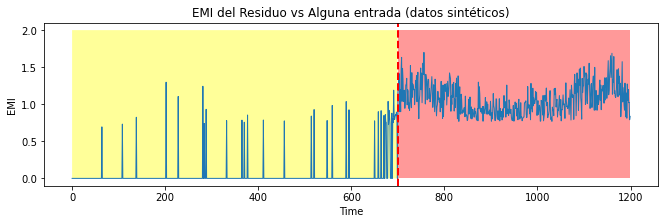

In [165]:
#generate a random time series
y_random_1 = np.random.normal(0,0.24,1200) + np.sin(np.arange(0,1200,1)/100)/2 + np.cos(np.arange(0,1200,1)/10)/10 + np.sin(np.arange(0,1200,1)/50)/5
#generate a half zero vector and half random vector + y_random_1
y_random_2 = np.concatenate((np.random.normal(0,0.5,600), + np.arange(0,100)/100 + np.random.normal(0,0.3,100) , 1 + np.abs(y_random_1[700:])), axis=0)
#suavizate the time series
# y_random_2 = np.convolve(y_random_2, np.ones((wsize,))/wsize, mode='same')


plt.figure(figsize=(11, 3))
#plot 0 if the residual is less than 0.1, otherwise plot y_random_1
plt.plot(np.where((y_random_2) < 0.9, 0, y_random_2)/1.3, lw = 1)
plt.title('EMI del Residuo vs Alguna entrada (datos sintéticos)')
plt.xlabel('Time')
plt.ylabel('EMI')

plt.fill_between(np.arange(700,1200),0, 2, facecolor='red', alpha=0.4)
plt.fill_between(np.arange(0,700),0, 2, facecolor='yellow', alpha=0.4)
plt.axvline(700, color='r', linestyle='--', label='Window', lw = 2)

plt.savefig('emisintetico.svg',bbox_inches='tight', dpi=150)

plt.show()


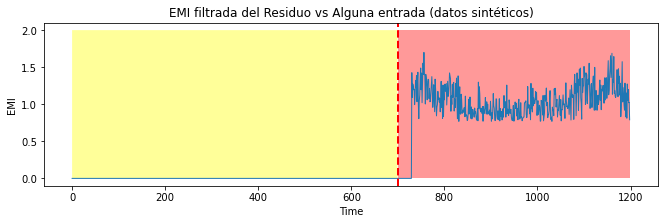

In [192]:
y_3 = np.where((y_random_2) < 0.9, 0, y_random_2)/1.3

#filter y_3 by a moving window, if there are less than 30 non-zero values, then the window is considered as a zero window
wsize = 30

y_4 = [0]*wsize

for i in range(wsize,len(y_3)-1):

    if np.count_nonzero(y_3[i-wsize:i]) == 30:
        try:
            y_4.append(y_3[i])
        except:
            y_4.append(0)
    else:
        y_4.append(0)




#plot the filtered time series
plt.figure(figsize=(11, 3))
plt.plot(y_4, lw = 1)
plt.title('EMI filtrada del Residuo vs Alguna entrada (datos sintéticos)')
plt.xlabel('Time')
plt.ylabel('EMI')



plt.fill_between(np.arange(700,1200),0, 2, facecolor='red', alpha=0.4)
plt.fill_between(np.arange(0,700),0, 2, facecolor='yellow', alpha=0.4)
plt.axvline(700, color='r', linestyle='--', label='Window', lw = 2)

plt.savefig('emisintetico_filtered.svg',bbox_inches='tight', dpi=150)

In [186]:
i+30

1200

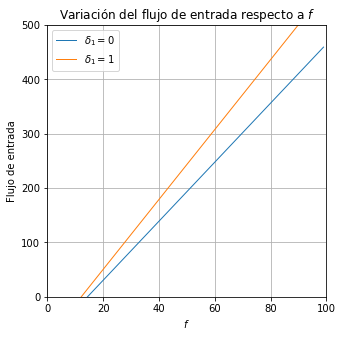

In [215]:
x1 = np.arange(0, 100, 1)
y1 = (5.43)*x1 - 78.23
y2 = (5.43 + 1)*x1 - 78.23 

fig = plt.figure(figsize=(5,5))
plt.plot(x1, y1, lw = 1, label = r'$\delta_1 = 0$')
plt.plot(x1, y2, lw = 1, label = r'$\delta_1 = 1$')
#add grid
plt.grid()
#limit between 0 and 100
plt.xlim((0, 100))
#limit y from 0
plt.ylim((0, 500))
#add legend
plt.legend()
plt.title(r'Variación del flujo de entrada respecto a $f$')
plt.xlabel(r'$f$')
plt.ylabel(r'Flujo de entrada')

plt.savefig('flineal.svg',bbox_inches='tight', dpi=150)

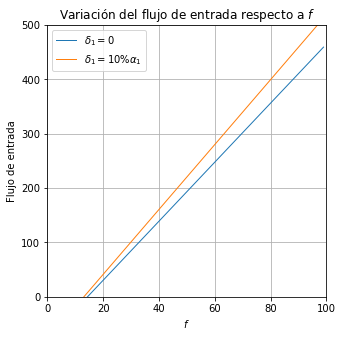

In [214]:
#plot several functions in the same figure

x1 = np.arange(0, 100, 1)
y1 = (5.43)*x1 - 78.23
y2 = (5.43 + 0.54)*x1 - 78.23 

fig = plt.figure(figsize=(5,5))
plt.plot(x1, y1, lw = 1, label = r'$\delta_1 = 0$')
plt.plot(x1, y2, lw = 1, label = r'$\delta_1 = 10\% \alpha_1$')
#add grid
plt.grid()
#limit between 0 and 100
plt.xlim((0, 100))
#limit y from 0
plt.ylim((0, 500))
#add legend
plt.legend()
plt.title(r'Variación del flujo de entrada respecto a $f$')
plt.xlabel(r'$f$')
plt.ylabel(r'Flujo de entrada')

plt.savefig('fajustada.svg',bbox_inches='tight', dpi=150)

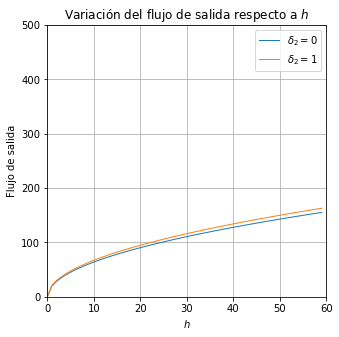

In [213]:
#plot several functions in the same figure

x1 = np.arange(0, 60, 1)
y1 = 20.21*np.sqrt(x1)
y2 = (20.21+1)*np.sqrt(x1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1, y1, lw = 1, label = r'$\delta_2 = 0$')
plt.plot(x1, y2, lw = 1, label = r'$\delta_2 = 1$')
#add grid
plt.grid()
#limit between 0 and 100
plt.xlim((0, 60))
#limit y from 0
plt.ylim((0, 500))
#add legend
plt.legend()
plt.title(r'Variación del flujo de salida respecto a $h$')
plt.xlabel(r'$h$')
plt.ylabel(r'Flujo de salida')

plt.savefig('hlineal.svg',bbox_inches='tight', dpi=150)

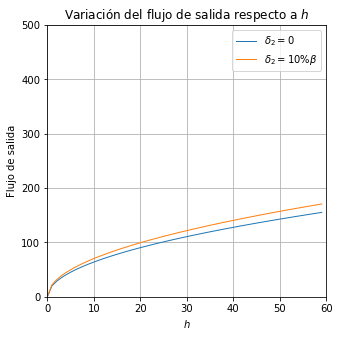

In [212]:
#plot several functions in the same figure

x1 = np.arange(0, 60, 1)
y1 = 20.21*np.sqrt(x1)
y2 = (20.21+2.021)*np.sqrt(x1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1, y1, lw = 1, label = r'$\delta_2 = 0$')
plt.plot(x1, y2, lw = 1, label = r'$\delta_2 = 10\% \beta$')
#add grid
plt.grid()
#limit between 0 and 100
plt.xlim((0, 60))
#limit y from 0
plt.ylim((0, 500))
#add legend
plt.legend()
plt.title(r'Variación del flujo de salida respecto a $h$')
plt.xlabel(r'$h$')
plt.ylabel(r'Flujo de salida')

plt.savefig('hajustada.svg',bbox_inches='tight', dpi=150)